In [49]:
import numpy as np
import seaborn as sns
sns.set();
import matplotlib.pyplot as plt
%matplotlib inline

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


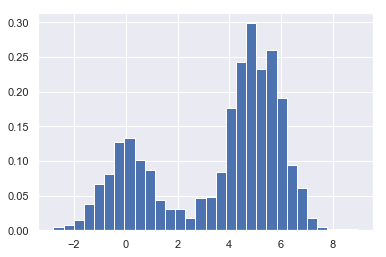

In [50]:
def make_data(N, f=0.3, rseed=1):
    rand = np.random.RandomState(rseed)
    x = rand.randn(N)
    x[int(f*N):] += 5
    return x

x = make_data(1000)
hist = plt.hist(x, bins=30, normed=True)

In [51]:
density, bins, patches = hist
widths = bins[1:] - bins[:-1]
(density*widths).sum()

1.0

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


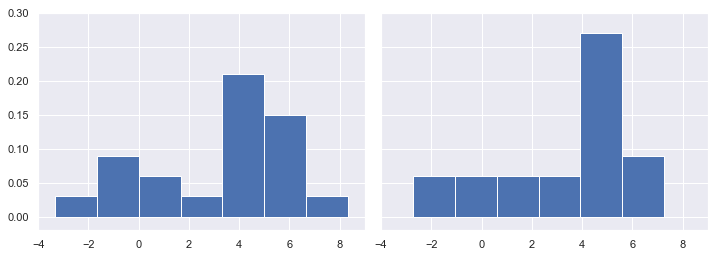

In [52]:
x = make_data(20)
bins = np.linspace(-5, 10, 10)

fig, ax = plt.subplots(1, 2, figsize=(12, 4), sharex=True, sharey=True, subplot_kw={'xlim':(-4,9), 'ylim':(-0.02,0.3)})
fig.subplots_adjust(wspace=0.05)

for i, offset in enumerate([0,0.6]):
    ax[i].hist(x, bins=bins + offset, normed=True)
    #ax[i].plot(x, np.full_like(x, -0.01), '|k', markeredgewidth=1)

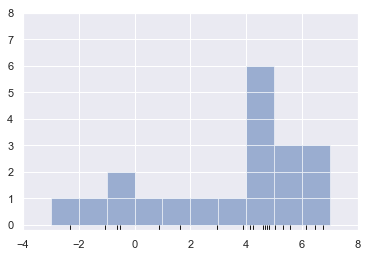

In [53]:
fig, ax = plt.subplots()
bins = np.arange(-3,8)
ax.plot(x, np.full_like(x, -0.1), '|k', markeredgewidth=1)
for count, edge in zip(*np.histogram(x, bins)):
    for i in range(count):
        ax.add_patch(plt.Rectangle((edge,i), 1, 1, alpha=0.5))
ax.set_xlim(-4, 8)
ax.set_ylim(-0.2, 8);

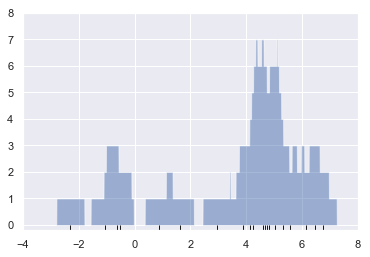

In [54]:
x_d = np.linspace(-4, 8, 2000)
density = sum((abs(xi- x_d)<0.5) for xi in x)

plt.fill_between(x_d, density, alpha=0.5)
plt.plot(x, np.full_like(x, -0.1), '|k', markeredgewidth=1)
plt.axis([-4,8,-0.2,8]);

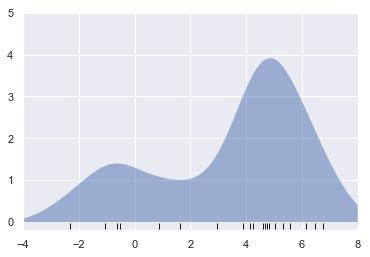

In [55]:
from scipy.stats import norm
x_d = np.linspace(-4, 8, 2000)
density = sum(norm(xi).pdf(x_d) for xi in x)

plt.fill_between(x_d, density, alpha=0.5)
plt.plot(x, np.full_like(x, -0.1), '|k', markeredgewidth=1)
plt.axis([-4,8,-0.2,5]);

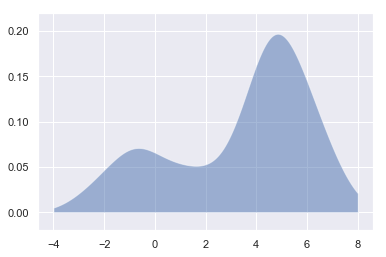

In [56]:
from sklearn.neighbors import KernelDensity

kde = KernelDensity(bandwidth=1, kernel='gaussian')
kde.fit(x[:,None])

logprob = kde.score_samples(x_d[:,None])

plt.fill_between(x_d, np.exp(logprob), alpha=0.5)
plt.plot(x, np.full_like(x, -0.1), '|k', markeredgewidth=1)
plt.ylim(-0.02, 0.22);

In [57]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV, LeaveOneOut

In [58]:
bandwidths = 10*np.linspace(-1, 1, 100)
grid = GridSearchCV(KernelDensity(kernel='gaussian'), {'bandwidth': bandwidths}, cv=LeaveOneOut())
grid.fit(x[:, None])

GridSearchCV(cv=LeaveOneOut(), error_score='raise-deprecating',
             estimator=KernelDensity(algorithm='auto', atol=0, bandwidth=1.0,
                                     breadth_first=True, kernel='gaussian',
                                     leaf_size=40, metric='euclidean',
                                     metric_params=None, rtol=0),
             iid='warn', n_jobs=None,
             param_grid={'bandwidth': array([-10.        ,  -9.7979798 ,  -9.5959596 ,  -9.39393939,
        -9.19191919,  -8.98989899,  -8.78787879,  -...
         4.54545455,   4.74747475,   4.94949495,   5.15151515,
         5.35353535,   5.55555556,   5.75757576,   5.95959596,
         6.16161616,   6.36363636,   6.56565657,   6.76767677,
         6.96969697,   7.17171717,   7.37373737,   7.57575758,
         7.77777778,   7.97979798,   8.18181818,   8.38383838,
         8.58585859,   8.78787879,   8.98989899,   9.19191919,
         9.39393939,   9.5959596 ,   9.7979798 ,  10.        ])},
       

In [59]:
grid.best_params_

{'bandwidth': 1.1111111111111116}

In [60]:
bandwidths = 10*np.linspace(-1, 1, 100)
grid_rand = RandomizedSearchCV(KernelDensity(kernel='gaussian'), {'bandwidth': bandwidths}, cv=LeaveOneOut())
grid_rand.fit(x[:, None])

RandomizedSearchCV(cv=LeaveOneOut(), error_score='raise-deprecating',
                   estimator=KernelDensity(algorithm='auto', atol=0,
                                           bandwidth=1.0, breadth_first=True,
                                           kernel='gaussian', leaf_size=40,
                                           metric='euclidean',
                                           metric_params=None, rtol=0),
                   iid='warn', n_iter=10, n_jobs=None,
                   param_distributions={'bandwidth': array([-10.        ,  -9.7979798 ,  -9.5959596 ,  -9.39393939,
        -9.19191919,...
         5.35353535,   5.55555556,   5.75757576,   5.95959596,
         6.16161616,   6.36363636,   6.56565657,   6.76767677,
         6.96969697,   7.17171717,   7.37373737,   7.57575758,
         7.77777778,   7.97979798,   8.18181818,   8.38383838,
         8.58585859,   8.78787879,   8.98989899,   9.19191919,
         9.39393939,   9.5959596 ,   9.7979798 ,  10.        ]

In [61]:
grid_rand.best_params_

{'bandwidth': 2.9292929292929304}

In [64]:
from sklearn.datasets import fetch_species_distributions

data = fetch_species_distributions()

latlon = np.vstack([data.train['dd lat'], data.train['dd long']]).T
species = np.array([d.decode('ascii').startswith('micro') for d in data.train['species']], dtype='int')

In [67]:
import mpl_toolkits
from sklearn.datasets.species_distributions import construct_grids

In [ ]:
xgrid, ygrid = construct_grids(data)
m = mpl_toolkits.basemap.Basemap(projection='cyl', resolution='c',
llcrnrlat=ygrid.min(), urcrnrlat=ygrid.max(),
llcrnrlon=xgrid.min(), urcrnrlon=xgrid.max())
m.drawmapboundary(fill_color='#DDEEFF')
m.fillcontinents(color='#FFEEDD')
m.drawcoastlines(color='gray', zorder=2)
m.drawcountries(color='gray', zorder=2)
m.scatter(latlon[:, 1], latlon[:, 0], zorder=3,
c=species, cmap='rainbow', latlon=True);

In [ ]:
X, Y = np.meshgrid(xgrid[::5], ygrid[::5][::-1])
land_reference = data.coverages[6][::5, ::5]
land_mask = (land_reference > -9999).ravel()
xy = np.vstack([Y.ravel(), X.ravel()]).T xy = np.radians(xy[land_mask])
fig, ax = plt.subplots(1, 2)
fig.subplots_adjust(left=0.05, right=0.95, wspace=0.05)
species_names = ['Bradypus Variegatus', 'Microryzomys Minutus']
cmaps = ['Purples', 'Reds']
for i, axi in enumerate(ax):
    axi.set_title(species_names[i])
    m = Basemap(projection='cyl', llcrnrlat=Y.min(),
    urcrnrlat=Y.max(), llcrnrlon=X.min(),
    urcrnrlon=X.max(), resolution='c', ax=axi)
    m.drawmapboundary(fill_color='#DDEEFF')
    m.drawcoastlines()
    m.drawcountries()
    kde = KernelDensity(bandwidth=0.03, metric='haversine')
    kde.fit(np.radians(latlon[species == i]))
    Z = np.full(land_mask.shape[0], -9999.0)
    Z[land_mask] = np.exp(kde.score_samples(xy))
    Z = Z.reshape(X.shape)
    levels = np.linspace(0, Z.max(), 25)
    axi.contourf(X, Y, Z, levels=levels, cmap=cmaps[i])

In [69]:
from sklearn.base import BaseEstimator, ClassifierMixin
class KDEClassifier(BaseEstimator, ClassifierMixin):
    def __init__(self, bandwidth=1.0, kernel='gaussian'):
        self.bandwidth = bandwidth
        self.kernel = kernel
    def fit(self, X, y):
        self.classes_ = np.sort(np.unique(y))
        training_sets = [X[y == yi] for yi in self.classes_]
        self.models_ = [KernelDensity(bandwidth=self.bandwidth, kernel=self.kernel).fit(Xi) for Xi in training_sets]
        self.logpriors_ = [np.log(Xi.shape[0] / X.shape[0]) for Xi in training_sets]
        return self
    def predict_proba(self, X):
        logprobs = np.array([model.score_samples(X) for model in self.models_]).T
        result = np.exp(logprobs + self.logpriors_)
        return result / result.sum(1, keepdims=True)
    def predict(self, X):
        return self.classes_[np.argmax(self.predict_proba(X), 1)]

In [70]:
from sklearn.datasets import load_digits
digits = load_digits()

In [73]:
bandwidths = 10 ** np.linspace(0, 2, 100)
grid = GridSearchCV(KDEClassifier(), {'bandwidth': bandwidths})
grid.fit(digits.data, digits.target)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


GridSearchCV(cv='warn', error_score='raise-deprecating',
             estimator=KDEClassifier(bandwidth=1.0, kernel='gaussian'),
             iid='warn', n_jobs=None,
             param_grid={'bandwidth': array([  1.        ,   1.04761575,   1.09749877,   1.149757  ,
         1.20450354,   1.26185688,   1.32194115,   1.38488637,
         1.45082878,   1.51991108,   1.59228279,   1.66810054,
         1.7475284 ,   1.83073828,   1.91791026,   2.009233  ,
         2.10490414,   2.20513074...
        34.30469286,  35.93813664,  37.64935807,  39.44206059,
        41.320124  ,  43.28761281,  45.34878508,  47.50810162,
        49.77023564,  52.14008288,  54.62277218,  57.22367659,
        59.94842503,  62.80291442,  65.79332247,  68.92612104,
        72.20809018,  75.64633276,  79.24828984,  83.02175681,
        86.97490026,  91.11627561,  95.45484567, 100.        ])},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [77]:
grid.cv_results_['mean_test_score']

array([0.49415693, 0.40957151, 0.53533667, 0.43238731, 0.47801892,
       0.38731219, 0.45019477, 0.48414023, 0.43516973, 0.44963829,
       0.51752922, 0.4885921 , 0.52531998, 0.52198108, 0.62548692,
       0.65943239, 0.66277129, 0.70116861, 0.71841959, 0.80634391,
       0.81580412, 0.84974958, 0.88870339, 0.90595437, 0.92042293,
       0.93600445, 0.95102949, 0.95548136, 0.95993322, 0.96215915,
       0.96327212, 0.96327212, 0.96438509, 0.96494157, 0.96438509,
       0.96438509, 0.96438509, 0.9638286 , 0.9638286 , 0.96494157,
       0.96549805, 0.96494157, 0.96661102, 0.96661102, 0.96605454,
       0.96605454, 0.96605454, 0.96605454, 0.96327212, 0.96048971,
       0.95548136, 0.95492487, 0.95269894, 0.95269894, 0.95047301,
       0.9476906 , 0.94268225, 0.93934335, 0.93600445, 0.9309961 ,
       0.92821369, 0.92264886, 0.91930996, 0.91652755, 0.91318865,
       0.90873678, 0.90595437, 0.90094602, 0.89315526, 0.88870339,
       0.88759043, 0.8853645 , 0.88425153, 0.88313856, 0.88035

In [78]:
scores = grid.cv_results_['mean_test_score']

{'bandwidth': 7.054802310718643}
accuracy = 0.9666110183639399


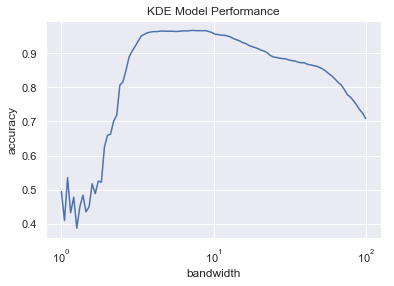

In [79]:
plt.semilogx(bandwidths, scores)
plt.xlabel('bandwidth')
plt.ylabel('accuracy')
plt.title('KDE Model Performance')
print(grid.best_params_)
print('accuracy =', grid.best_score_)

In [80]:
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import cross_val_score
cross_val_score(GaussianNB(), digits.data, digits.target).mean()

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


0.8186003803550138